# 电影分类
### Step 1：加载路透社数据集

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 1s 0us/step


In [2]:
len(train_data)

8982

### Step 2：准备数据

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1 
    return results

# 数据向量化
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

from keras.utils.np_utils import to_categorical

# one_hot编码
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

one_hot_test_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Step 3：构建网络并训练

In [6]:
from keras import models 
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 38ms/step - loss: 2.7082 - accuracy: 0.5056 - val_loss: 1.7693 - val_accuracy: 0.6360
Epoch 2/20
16/16 [==============================] - 0s 23ms/step - loss: 1.4201 - accuracy: 0.7110 - val_loss: 1.2892 - val_accuracy: 0.7160
Epoch 3/20
16/16 [==============================] - 0s 29ms/step - loss: 1.0335 - accuracy: 0.7756 - val_loss: 1.1448 - val_accuracy: 0.7520
Epoch 4/20
16/16 [==============================] - 0s 23ms/step - loss: 0.8140 - accuracy: 0.8241 - val_loss: 1.0116 - val_accuracy: 0.7930
Epoch 5/20
16/16 [==============================] - 0s 22ms/step - loss: 0.6450 - accuracy: 0.8663 - val_loss: 0.9413 - val_accuracy: 0.8120
Epoch 6/20
16/16 [==============================] - 0s 23ms/step - loss: 0.5137 - accuracy: 0.8976 - val_loss: 0.9165 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 0s 23ms/step - loss: 0.4069 - accuracy: 0.9178 - val_loss: 0.9467 - val_accuracy: 0.7860
Epoch 8/20
16

### Step 4：绘制图像
**训练精度和验证精度**

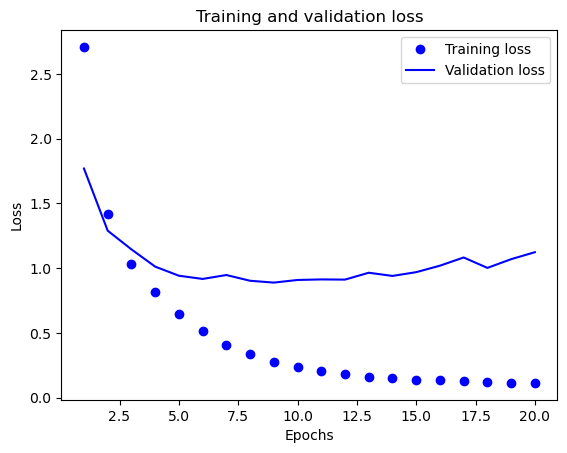

In [8]:
import matplotlib.pyplot as plt 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**训练精度和验证精度**

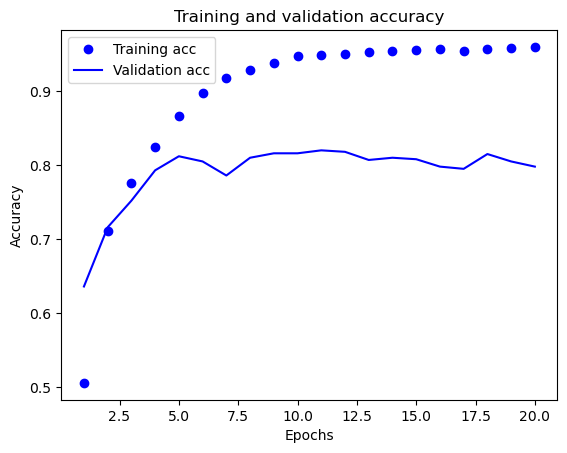

In [9]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Step 5：从头开始重新训练模型

In [10]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 9,
                    batch_size = 512,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

results

Epoch 1/9
16/16 [==============================] - 1s 35ms/step - loss: 2.5212 - accuracy: 0.5395 - val_loss: 1.6761 - val_accuracy: 0.6360
Epoch 2/9
16/16 [==============================] - 0s 23ms/step - loss: 1.3923 - accuracy: 0.7091 - val_loss: 1.2837 - val_accuracy: 0.7000
Epoch 3/9
16/16 [==============================] - 0s 22ms/step - loss: 1.0417 - accuracy: 0.7746 - val_loss: 1.1206 - val_accuracy: 0.7520
Epoch 4/9
16/16 [==============================] - 0s 23ms/step - loss: 0.8247 - accuracy: 0.8264 - val_loss: 1.0274 - val_accuracy: 0.7880
Epoch 5/9
16/16 [==============================] - 0s 23ms/step - loss: 0.6573 - accuracy: 0.8609 - val_loss: 0.9625 - val_accuracy: 0.8010
Epoch 6/9
16/16 [==============================] - 0s 23ms/step - loss: 0.5266 - accuracy: 0.8898 - val_loss: 0.9458 - val_accuracy: 0.8140
Epoch 7/9
16/16 [==============================] - 0s 25ms/step - loss: 0.4237 - accuracy: 0.9105 - val_loss: 0.8898 - val_accuracy: 0.8190
Epoch 8/9
16/16 [===

[1.0385942459106445, 0.7724844217300415]

In [11]:
predictions = model.predict(x_test)

predictions[0].shape

71/71 [==============================] - 0s 2ms/step


(46,)

In [12]:
np.argmax(predictions[0])

3